## read from arduino to txt

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial

SerialException: ignored

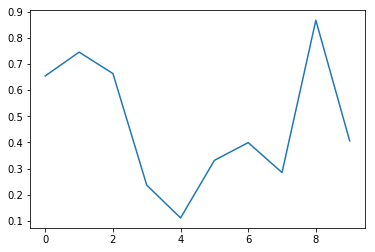

In [0]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
# ax.set_ylim(-5000, 5000)
# xdata, ydata = [0]*100, [0]*100
myPort = serial.Serial("COM4",500000)
# raw.open()

#bufferSize is the length of the input buffer
#batchSize is the length of list store in one line in the file
bufferSize = 2048
batchSize = 64
idx = 0

with open('cjc.txt', 'w') as file:
    pass
f = open('cjc.txt', 'a')
def read_serial():
    carve = 0
    highByte = 0
    lowByte = 0
    buffer = np.zeros(bufferSize)
    while (myPort.in_waiting < bufferSize):
        pass
    for i in range(bufferSize):
        carve = ord(myPort.read())
        while (carve != ord(b'\xff')):
            carve = ord(myPort.read())
        while (myPort.in_waiting < 2):
            pass
        highByte = ord(myPort.read())
        lowByte = ord(myPort.read())
        buffer[i] = highByte << 8 | lowByte
    # plt.scatter(pltx, plty, s=0.1)
    # plt.show()
    # plt.pause(0.0001)
    
    print(buffer)
    np.savetxt(f,buffer,delimiter=',')
    return buffer


def update(data):
    line.set_ydata(data)
    return line,

def run(data):
    t,y = data
    line.set_data(t, y)
    return line,

def data_gen():
    pltx = np.array([])
    plty = np.array([])
    global idx
    while True:
        try:
            dat = read_serial()
            
        except:
            dat = np.zeros(bufferSize)

        plt.axis([idx-20480, idx+bufferSize, -100, 700])
        for i in range(bufferSize):
            pltx=np.append(pltx,idx)
            idx += 1
        # print(dat)
        plty = np.concatenate((plty,dat))
        pltx = pltx[-20480:]
        plty = plty[-20480:]
        yield pltx, plty

ani = animation.FuncAnimation(fig, run, data_gen, interval=0, blit=True)
plt.show()
f.close()

In [0]:
myPort.close()

## Read data from txt and process

In [0]:
print(np.zeros(bufferSize))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler

batchSize = 2048

with open("file1.txt",'r') as file:
    y = np.loadtxt(file,delimiter=',')
print(y.shape)
y = np.reshape(y,(-1,batchSize))
y = np.reshape(y,(1,-1))
print(y.shape)
segment = SegmentX(width=batchSize, step=batchSize, shuffle=False, random_state=None, order='F')
y = segment.transform(y)[0]
print(y.shape)
maxy = maximum(y)
miny = minimum(y)
print(maxy.shape)
print(miny.shape)
# y=np.transpose(y)
# scaler = MinMaxScaler()
# scaler.fit(y)
# y=scaler.transform(y)
# y=np.transpose(y)
# y = y-np.mean(y)
print(y)
loi = y[0:10]
loi = np.reshape(loi,(1,-1))
loi = loi[0]
# loi[loi>1000] = np.mean(y)
print(loi.size)

In [0]:
#list_of_interest
from scipy.signal import *
peaks = find_peaks_cwt(loi,np.arange(1,100))
max_peak_idx = np.argmax(loi[peaks])
peaks_needed = 4
proper_peaks = [max_peak_idx-i for i in range(-3,peaks_needed) ]
proper_peaks = peaks[proper_peaks]
# print(proper_peaks)

plt.plot(loi)
plt.plot(peaks,loi[peaks],"x")
plt.plot(proper_peaks,loi[proper_peaks],"o")
# plt.axis([6000, 10000, -100, 150])
plt.show()
# print(peaks.size)

In [0]:
from scipy import signal

plt.plot(loi)
plt.show()
plt.figure()
plt.plot(signal.detrend(loi))
plt.figure()
plt.plot(np.abs(np.fft.rfft(loi[13000:15500])))
numpy.fft.fftfreq(len(loi[13000:15500]))
plt.axis([0,100,0,100000])
plt.show()

## different objects

(60, 2048)
[361. 362. 362. ... 355. 354. 352.]



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer


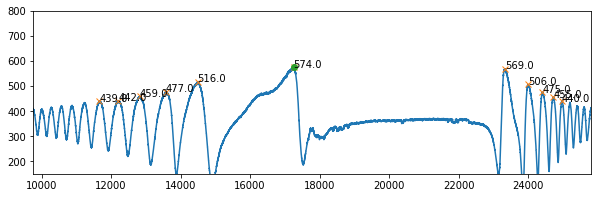

(25, 2048)
[398. 397. 401. ... 417. 413. 410.]



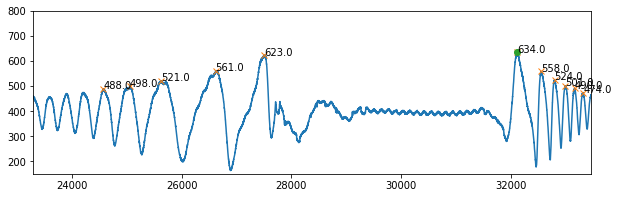

(23, 2048)
[392. 392. 395. ... 389. 392. 393.]



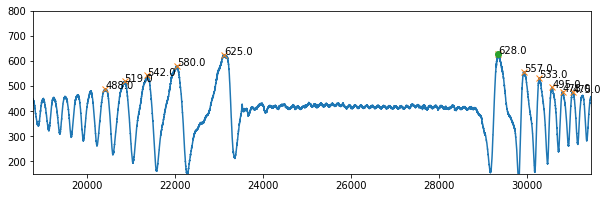

(22, 2048)
[397. 394. 395. ... 403. 403. 399.]



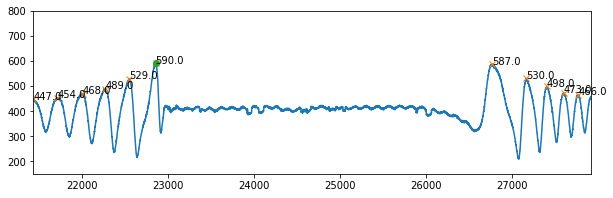

(48, 2048)
[371. 372. 371. ... 375. 376. 376.]



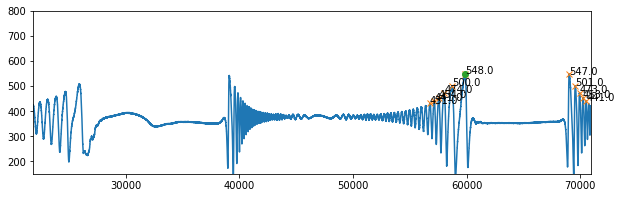

(32, 2048)
[343. 343. 341. ... 366. 366. 367.]



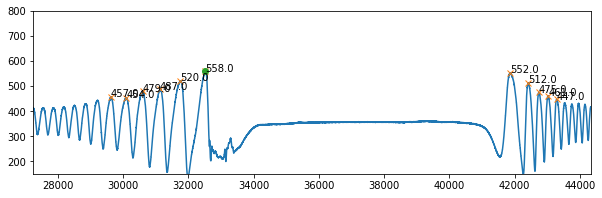

(27, 2048)
[358. 358. 358. ... 361. 360. 360.]



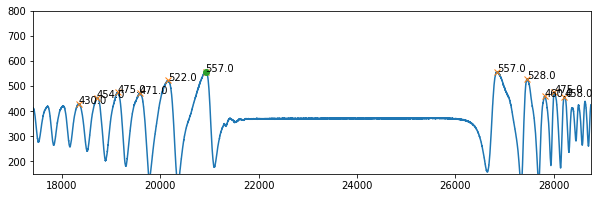

(27, 2048)
[360. 360. 360. ... 361. 362. 362.]



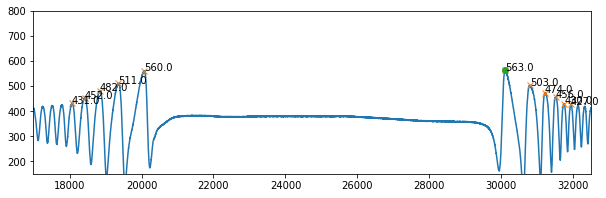

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
import math
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from scipy.signal import find_peaks
    
batchSize = 2048
file_names = ["1pad_back","2pad_front","3storage_box","4blue_lid","5coffee_mug","6mujie_hand","7paper_box","8surface_cover","9moniter","10black_book","11metal_grid"
             "12lamp_top","13phone"]
metal_names = ["1pad_back","2pad_front","5coffee_mug","11metal_grid","12lamp_top","13phone","14can","15shovel"]


for i in range(len(metal_names)):
    cur_names = metal_names[i] + ".txt"
    with open(cur_names,'r') as file:
        y = np.loadtxt(file,delimiter=',')
    print(y.shape)
    y = np.reshape(y,(-1,batchSize))
    y = np.reshape(y,(1,-1))
#     print(y.shape)
    segment = SegmentX(width=batchSize, step=batchSize, shuffle=False, random_state=None, order='F')
    y = segment.transform(y)[0]
#     print(y.shape)
    maxy = maximum(y)
    miny = minimum(y)
    
    if(cur_names=="1pad_back.txt"): 
        loi = 800 - y[-23:-5].reshape(1,-1)[0]
    else:
        loi = 800 - y.reshape(1,-1)[0][200:]
    np.delete(loi, loi>1000)
    print(loi)
    # automatic pick 11 peaks
    loi_mean = loi - np.mean(loi)
    peaks,_ = find_peaks(loi_mean,distance=100, height = 50, width = 10)
    max_peak_idx = np.argmax(loi[peaks])
#     print(max_peak_idx)
    print()
    peaks_needed = 11
    proper_peaks = [max_peak_idx-i for i in range(-int(peaks_needed/2),math.ceil(peaks_needed/2))]
    proper_peaks = peaks[proper_peaks]
    
    
#     plt.plot(proper_peaks,loi[proper_peaks],"o")
    plt.figure(figsize=(10,3))
    plt.plot(loi)
    plt.plot(proper_peaks,loi[proper_peaks],"x")
#     plt.plot(peaks,loi[peaks],"x")

    plt.plot(peaks[max_peak_idx],loi[peaks[max_peak_idx]],"o")
    plt.axis([peaks[0],peaks[-1],150,800])
#     plt.plot(range(len(loi)),loi,markersize=1)
    for i in proper_peaks:
        plt.text(i,loi[i],str(loi[i]))
    
    plt.show()
    # np.savetxt


## height cross validation

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer


<Figure size 720x216 with 0 Axes>

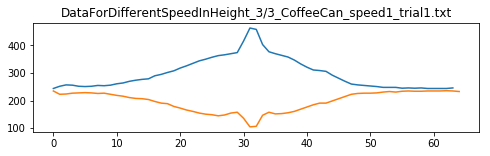

<Figure size 720x216 with 0 Axes>

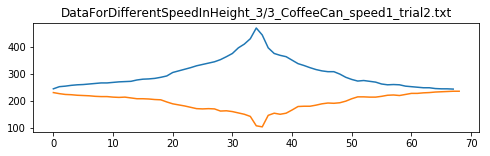

<Figure size 720x216 with 0 Axes>

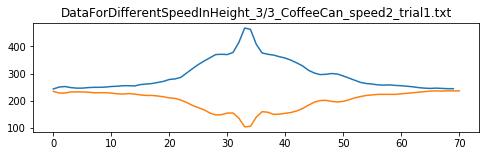

<Figure size 720x216 with 0 Axes>

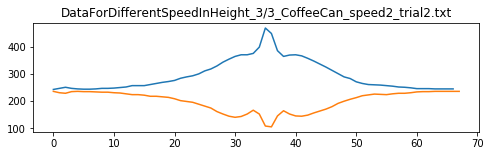

<Figure size 720x216 with 0 Axes>

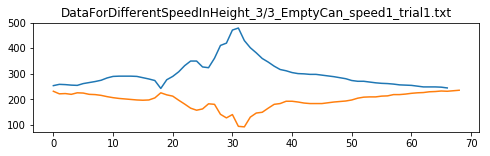

<Figure size 720x216 with 0 Axes>

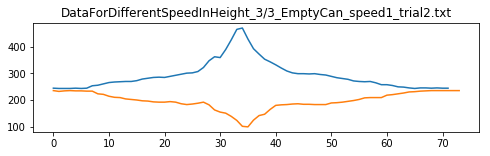

<Figure size 720x216 with 0 Axes>

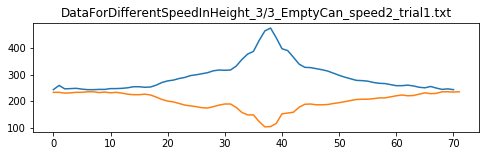

<Figure size 720x216 with 0 Axes>

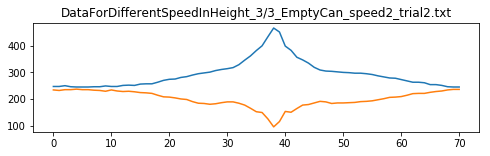

<Figure size 720x216 with 0 Axes>

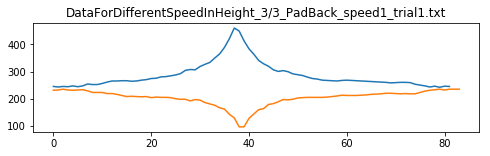

<Figure size 720x216 with 0 Axes>

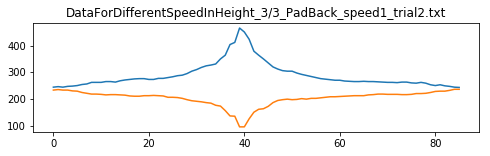

<Figure size 720x216 with 0 Axes>

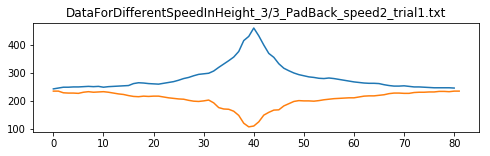

<Figure size 720x216 with 0 Axes>

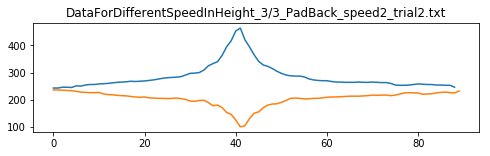

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
import math
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from scipy import signal
import heapq


def find_peaks(L, mean_thres = 0, height_thres = 0, width = 200, mode = 1):
    res = []
    upper=[]
    lower=[]
    register = 0
    mean = np.mean(L[-200:])
    
    if(mean_thres == 0):
        mean_thres = np.ptp(L)/20
    if(height_thres == 0):
        height_thres = mean_thres
    plt.figure(figsize=(8,2))
#     plt.hlines(mean+mean_thres,0,len(L))    
#     plt.hlines(mean,0,len(L))

    # status flag
    # 0 -- starting
    # 1 -- 
    # 2 -- not determined
    # 3 -- not determined
    # 4 -- not determined

    status = 0 
    jump_flag = 0
    i = 0
#     for i in range(len(L)-1):
    while(True):
        i+=1
        if(i+1 >= len(L)):
            break
        
        if(L[i] > max(mean_thres,height_thres) + mean or L[i] < - max(mean_thres,height_thres) + mean):
            if(L[i] > max(mean_thres,height_thres) + mean):
                status=1
            else:
                status=3
            if(status==1):
                #开始下降
                if(L[i]>L[i+1]):
                    #未来width个点没有比这个更高的 || 低下了mean下thres
                    for j in range(1,len(L)-i):
                        if( L[i+j] >= L[i] ):
                            i = i+j-1
                            jump_flag = 1
                            break
                        elif( L[i+j] < - mean_thres + mean):
                            res.append(i)
                            upper.append(i)
                            i = i+j-1
                            jump_flag = 1
                            break
                    if(jump_flag == 1):
                        jump_flag = 0
                else:
                    status = 0

            elif(status==3):
                if(L[i]<=L[i+1]):
                    for j in range(1,len(L)-i):
                        if( L[i+j] <= L[i] ):
                            i = i+j-1
                            jump_flag = 1
                            break
                        elif(L[i+j]>mean_thres+mean):
                            res.append(i)
                            lower.append(i)
                            i=i+j-1
                            jump_flag = 1
                            break
                    if(jump_flag == 1):
                        jump_flag = 0
                else:
                    status = 0
    
    
    lower = np.array(lower)
    upper = np.array(upper)
    res = np.array(res)

    # ----------------------- filter the middle --------------------------------
    #mode = 0 filter using upper
    #       1 filter using lower
    #       2 no filtering
    if (mode == 1):
        filter_list = np.argsort(L[lower])[:2]
        filter_list = lower[filter_list]
        filter_list = np.sort(filter_list)
        lower = lower[ (filter_list[0] >= lower) | (lower >= filter_list[1])]
        upper = upper[ (filter_list[0] >= upper) | (upper >= filter_list[1])]
        res = res[ (filter_list[0] >= res) | (res >= filter_list[1])]
    elif (mode == 2):
        pass
    else:
        filter_list = np.argsort(L[upper])[-2:]
        filter_list = upper[filter_list]
        lower = lower[ (filter_list[0] >= lower) | (lower >= filter_list[1])]
        upper = upper[ (filter_list[0] >= upper) | (upper >= filter_list[1])]
        res = res[ (filter_list[0] >= res) | (res >= filter_list[1])]
    
    return (res,upper,lower)
   
batchSize = 2048
file_names = ["1pad_back","2pad_front","3storage_box","4blue_lid","5coffee_mug","6mujie_hand","7paper_box","8surface_cover","9moniter","10black_book","11metal_grid"
             "12lamp_top","13phone"]
metal_names = ["1pad_back","2pad_front","3coffee_mug","4metal_grid","5lamp_top","6phone","7shovel","8can"]
mono_names = ["CoffeeCan","EmptyCan","PadBack"]


for i in range(len(mono_names)):
    for k in range(1,3):
        for j in range(1,3):
            cur_names = "DataForDifferentSpeedInHeight_3/3_" + mono_names[i] + "_speed" + str(k) + "_trial" + str(j) + ".txt"
            try:
                with open(cur_names,'r') as file:
                    y = np.loadtxt(file,delimiter=',')
            except:
                continue
            y = np.reshape(y,(-1,batchSize))
            y = np.reshape(y,(1,-1))
            segment = SegmentX(width=batchSize, step=batchSize, shuffle=False, random_state=None, order='F')
            y = segment.transform(y)[0]

            loi = y.reshape(1,-1)[0][200:]
            np.delete(loi, loi>1000)
            plt.figure(figsize=(10,3))
            # -------------------------------------automatic pick peaks--------------------------------
            peaks,upper,lower = find_peaks(loi,height_thres=3,mean_thres=3,width = 20,mode=1)

    #         plt.plot(loi)
    #         plt.plot(upper,loi[upper],"x")
    #         plt.plot(lower,loi[lower],"o")
            plt.plot(np.arange(0,len(upper)),loi[upper])
            plt.plot(np.arange(0,len(lower)),loi[lower])
            plt.title(cur_names)
            plt.show()


## Miscellaneous

In [0]:

fig, ax = plt.subplots()
idx=0
def update(data):
    line.set_ydata(data)
    return line,

def run(data):
    t,y = data
    line.set_data(t, y)
    return line,

def data_gen():
    pltx = np.array([])
    plty = np.array([])
    global idx
    for i in y:
        try:
            dat = i
            
        except:
            dat = np.zeros(batchSize)

        plt.axis([idx-20480, idx+batchSize, 0, 1])
        for i in range(batchSize):
            pltx=np.append(pltx,idx)
            idx += 1
        # print(dat)
        plty = np.concatenate((plty,dat))
        pltx = pltx[-20480:]
        plty = plty[-20480:]
        yield pltx, plty

ani = animation.FuncAnimation(fig, run, data_gen, interval=0, blit=True)
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
import math
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from scipy.signal import find_peaks
    
batchSize = 2048

metal_names = ["height/4metal_grid_4"]
i=0
cur_names = metal_names[i] + ".txt"
with open(cur_names,'r') as file:
    y = np.loadtxt(file,delimiter=',')
print(y.shape)
y = np.reshape(y,(-1,batchSize))
y = np.reshape(y,(1,-1))
#     print(y.shape)
segment = SegmentX(width=batchSize, step=batchSize, shuffle=False, random_state=None, order='F')
y = segment.transform(y)[0]
#     print(y.shape)
maxy = maximum(y)
miny = minimum(y)
#     print(maxy.shape)
#     print(miny.shape)
# y=np.transpose(y)
# scaler = MinMaxScaler()
# scaler.fit(y)
# y=scaler.transform(y)
# y=np.transpose(y)
# y = y-np.mean(y)

#find the range

if(cur_names=="1pad_back.txt"): 
    loi = 800 - y[-23:-5].reshape(1,-1)[0]
else:
    loi = 800 - y.reshape(1,-1)[0][200:]
np.delete(loi, loi>1000)
print(loi)
# automatic pick 11 peaks
loi_mean = loi - np.mean(loi)
peaks,_ = find_peaks(loi_mean,distance=100, height = 20, width = 10)
max_peak_idx = np.argmax(loi[peaks])
#     print(max_peak_idx)
print()
peaks_needed = 11
proper_peaks = [max_peak_idx-i for i in range(-int(peaks_needed/2),math.ceil(peaks_needed/2))]
proper_peaks = peaks[proper_peaks]


#     plt.plot(proper_peaks,loi[proper_peaks],"o")

plt.subplot(4,3,i+1)
plt.figure(figsize=(10,3))
plt.plot(loi)
plt.plot(proper_peaks,loi[proper_peaks],"x")
#     plt.plot(peaks,loi[peaks],"x")

plt.plot(peaks[max_peak_idx],loi[peaks[max_peak_idx]],"o")
plt.axis([peaks[0],peaks[-1],150,800])
#     plt.plot(range(len(loi)),loi,markersize=1)
for i in proper_peaks:
    plt.text(i,loi[i],str(loi[i]))

plt.show()
# np.savetxt


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from scipy import fftpack

batchSize = 2048

with open("file1.txt",'r') as file:
    y = np.loadtxt(file,delimiter=',')
print(y.shape)
y = np.reshape(y,(-1,batchSize))
y = np.reshape(y,(1,-1))
print(y.shape)
segment = SegmentX(width=batchSize, step=batchSize, shuffle=False, random_state=None, order='F')
y = segment.transform(y)[0]
print(y.shape)
maxy = maximum(y)
miny = minimum(y)
print(maxy.shape)
print(miny.shape)
# y=np.transpose(y)
# scaler = MinMaxScaler()
# scaler.fit(y)
# y=scaler.transform(y)
# y=np.transpose(y)
y = y-np.mean(y)

y = y.reshape(1,-1)[0]

print(y)
np.delete(y, y>1000)
hx = fftpack.hilbert(y)
hy = np.sqrt(y**2+hx**2)
plt.figure(figsize=(10,3))
plt.plot(hy)
plt.plot(y)
plt.axis([2000,50000,-100,600])
plt.show()
y = -y
plt.figure(figsize=(10,3))
plt.plot(hy)
plt.plot(y)
plt.axis([2000,50000,-100,600])
plt.show()

In [0]:
from scipy import signal
xs = np.arange(0, np.pi, 0.05)
data = np.sin(xs)
peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind, xs[peakind], data[peakind]
plt.plot(data)
plt.plot(peakind,data[peakind],"x")
plt.show()

## peak algorithm

cjc
[ 9094 13482]


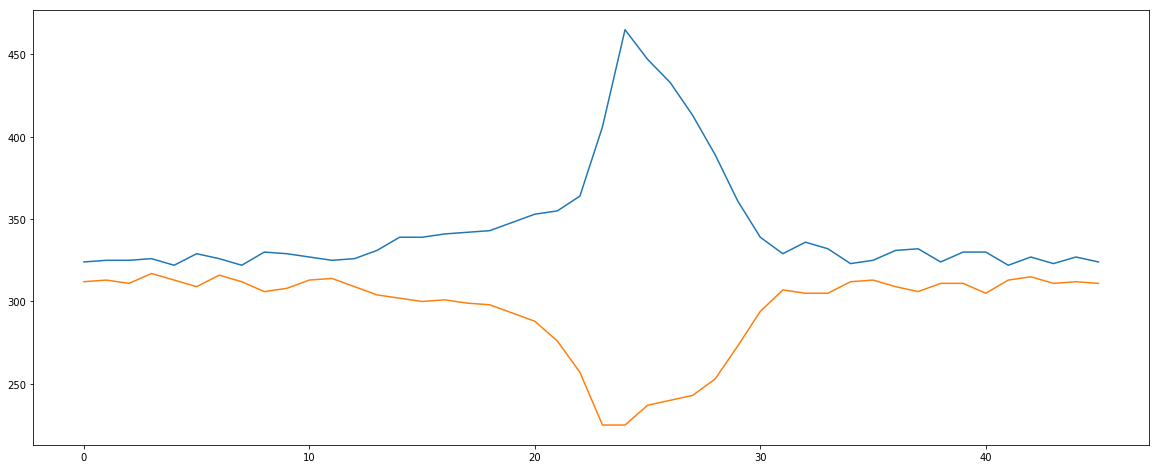

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from scipy import signal
import heapq

def find_peaks(L, mean_thres = 0, height_thres = 0, width = 200, mode = 0):
    res = []
    upper=[]
    lower=[]
    register = 0
#     mean = L[0] - signal.detrend(L)[0]-2
    mean = 0
    
    if(mean_thres == 0):
        mean_thres = np.ptp(L)/20
    if(height_thres == 0):
        height_thres = mean_thres
    plt.figure(figsize=(20,8))
#     plt.hlines(mean+mean_thres,0,len(L))    
#     plt.hlines(mean,0,len(L))

    # status flag
    # 0 -- starting
    # 1 -- 
    # 2 -- not determined
    # 3 -- not determined
    # 4 -- not determined

    status = 0 
    jump_flag = 0
    i = 0
#     for i in range(len(L)-1):
    while(True):
        i+=1
        if(i+1 >= len(L)):
            break
        
        if(L[i] > max(mean_thres,height_thres) + mean or L[i] < - max(mean_thres,height_thres) + mean):
            if(L[i] > max(mean_thres,height_thres) + mean):
                status=1
            else:
                status=3
            if(status==1):
                #开始下降
                if(L[i]>L[i+1]):
                    #未来width个点没有比这个更高的 || 低下了mean下thres
                    for j in range(1,len(L)-i):
                        if( L[i+j] >= L[i] ):
                            i = i+j-1
                            jump_flag = 1
                            break
                        elif( L[i+j] < - mean_thres + mean):
                            res.append(i)
                            upper.append(i)
                            i = i+j-1
                            jump_flag = 1
                            break
                    if(jump_flag == 1):
                        jump_flag = 0
                else:
                    status = 0

            elif(status==3):
                if(L[i]<=L[i+1]):
                    for j in range(1,len(L)-i):
                        if( L[i+j] <= L[i] ):
                            i = i+j-1
                            jump_flag = 1
                            break
                        elif(L[i+j]>mean_thres+mean):
                            res.append(i)
                            lower.append(i)
                            i=i+j-1
                            jump_flag = 1
                            break
                    if(jump_flag == 1):
                        jump_flag = 0
                else:
                    status = 0
    
    
    lower = np.array(lower)
    upper = np.array(upper)
    res = np.array(res)

    # ----------------------- filter the middle --------------------------------
    #mode = 0 filter using upper
    #       1 filter using lower
    #       2 no filtering
    if (mode == 1):
        print("cjc")
        filter_list = np.argsort(L[lower])[:2]
        filter_list = lower[filter_list]
        filter_list = np.sort(filter_list)
        print(filter_list)
        lower = lower[ (filter_list[0] >= lower) | (lower >= filter_list[1])]
        upper = upper[ (filter_list[0] >= upper) | (upper >= filter_list[1])]
        res = res[ (filter_list[0] >= res) | (res >= filter_list[1])]
    elif (mode == 2):
        pass
    else:
        filter_list = np.argsort(L[upper])[-2:]
        filter_list = upper[filter_list]
        lower = lower[ (filter_list[0] >= lower) | (lower >= filter_list[1])]
        upper = upper[ (filter_list[0] >= upper) | (upper >= filter_list[1])]
        res = res[ (filter_list[0] >= res) | (res >= filter_list[1])]
    
    return (res,upper,lower)
                        
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import serial
# from seglearn.transform import SegmentX
# from seglearn.feature_functions import maximum,minimum
# from sklearn.preprocessing import normalize,MinMaxScaler

batchSize = 2048

with open("file1.txt",'r') as file:
    y = np.loadtxt(file,delimiter=',')
y = np.reshape(y,(-1,batchSize))
y = np.reshape(y,(1,-1))
segment = SegmentX(width=batchSize, step=batchSize, shuffle=False, random_state=None, order='F')
y = segment.transform(y)[0]
maxy = maximum(y)
miny = minimum(y)

loi = y[0:10]
loi = np.reshape(loi,(1,-1))
loi = loi[0]
# loi[loi>1000] = np.mean(y)

peaks,upper,lower = find_peaks(loi,height_thres=2,mean_thres=2,width = 20,mode=1)


# plt.plot(loi)
# plt.plot(upper,loi[upper],"x")
plt.plot(np.arange(0,len(upper)),loi[upper])
plt.plot(np.arange(0,len(lower)),loi[lower])
# plt.axis([6200,6300,200,500])
# print(loi[5580:5595])
# print(upper[8])
# print(loi[upper[8]])
plt.show()

In [0]:
import numpy as np
a = np.array([1,4,2,5,3])
a[[False,False,False,False,True]]

array([3])

## random forest

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from scipy import signal
import heapq

def find_peaks(L, mean_thres = 0, height_thres = 0, width = 200, mode = 0):
    res = []
    upper=[]
    lower=[]
    register = 0
    mean = L[0] - signal.detrend(L)[0]-2
    
    if(mean_thres == 0):
        mean_thres = np.ptp(L)/20
    if(height_thres == 0):
        height_thres = mean_thres
#     plt.figure(figsize=(20,8))
#     plt.hlines(mean+mean_thres,0,len(L))    
#     plt.hlines(mean,0,len(L))

    # status flag
    # 0 -- starting
    # 1 -- 
    # 2 -- not determined
    # 3 -- not determined
    # 4 -- not determined

    status = 0 
    jump_flag = 0
    i = 0
#     for i in range(len(L)-1):
    while(True):
        i+=1
        if(i+1 >= len(L)):
            break
        
        if(L[i] > max(mean_thres,height_thres) + mean or L[i] < - max(mean_thres,height_thres) + mean):
            if(L[i] > max(mean_thres,height_thres) + mean):
                status=1
            else:
                status=3
            if(status==1):
                #开始下降
                if(L[i]>L[i+1]):
                    #未来width个点没有比这个更高的 || 低下了mean下thres
                    for j in range(1,len(L)-i):
                        if( L[i+j] >= L[i] ):
                            i = i+j-1
                            jump_flag = 1
                            break
                        elif( L[i+j] < - mean_thres + mean):
                            res.append(i)
                            upper.append(i)
                            i = i+j-1
                            jump_flag = 1
                            break
                    if(jump_flag == 1):
                        jump_flag = 0
                else:
                    status = 0

            elif(status==3):
                if(L[i]<=L[i+1]):
                    for j in range(1,len(L)-i):
                        if( L[i+j] <= L[i] ):
                            i = i+j-1
                            jump_flag = 1
                            break
                        elif(L[i+j]>mean_thres+mean):
                            res.append(i)
                            lower.append(i)
                            i=i+j-1
                            jump_flag = 1
                            break
                    if(jump_flag == 1):
                        jump_flag = 0
                else:
                    status = 0
    
    
    lower = np.array(lower)
    upper = np.array(upper)
    res = np.array(res)
    return (res,upper,lower)

In [0]:
# --------read-----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm



names = ["cjc", "qst", "smj"]
PATH = 'data/output/'

X = np.array([[]])
y = np.array([])

maxlen=0
for people in names:
    for i in range(1, 11):
        for j in range(10):
            curr_file = PATH + people + '_' + str(i) + '_' + str(j) + '_filtered.txt'
            data = np.array([])
            with open(curr_file,'r') as file:
                for line in file:
                    line = line[:-2]
                    data = np.append(data,line.split(","))
                y = np.append(y,i-1)
            data = data.reshape(-1,1)
            data = np.array([float(_) for _ in data])
            if len(data)>maxlen:
                maxlen = len(data)

            value = np.array([])
            #fft
            value = np.abs(np.fft.rfft(data,n=maxlen))[:]
            value = [value[:150]]
#             #extra feature 1
#             if(i==1):
#                 value = np.append(value,50)
#             elif(i==2):
#                 value = np.append(value,0)
#             elif(i==3):
#                 value = np.append(value,50)
#             elif(i==4):
#                 value = np.append(value,0)
#             else:
#                 value = np.append(value,0)
                
#             #extra feature 2
            peaks,upper,lower = find_peaks(data,height_thres=0.1,mean_thres=0.1,width = 10,mode=1)
#             print(1)
#             plt.figure()
#             plt.plot(data)
#             if(len(upper)):plt.plot(upper,data[upper],marker='*')
#             if(len(lower)):plt.plot(lower,data[lower],marker='*')
#             plt.show()
            value = np.append(value,len(peaks))
            value = np.append([value],peaks)
#             value = np.append(value,len(upper))
#             value = np.append(value,len(lower))
            
#             # the average distance of peaks
            
            value = np.append(value,max(data))
            value = np.append(value,min(data))
            value = [value]
            
            try:
                X = np.concatenate((X,value),axis=0)
            except:
                X = value



NameError: ignored

In [0]:
# --------read-----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm



y=[]
for i in range(100):
    if(int(i/10)==0 or int(i/10)==2):
        y.append(0)
    elif(int(i/10)==1 or int(i/10)==3):
        y.append(1)
    else:
        y.append(int(i/10))
y=y*3
print(y)

tsfresh_feature = pd.read_csv("../data/ .csv")
X = tsfresh_feature
print(X.shape)
maxyhat_train=0.0
maxyhat_test=0.0
temp = 0
feature_list=[]


for i in range(10,20):
    for j in range(10,20):
        x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.8, test_size=0.2)

        clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=j)
#         clf = svm.SVC(C=0.4,kernel='linear',gamma=5)
        clf.fit(x_train, y_train)
        temp = clf.score(x_train, y_train)
        
#         print(temp)
        if (temp > maxyhat_train).any():
            maxyhat_train = temp
        #show_accuracy(y_hat, y_train, '训练集')
        temp = clf.score(x_test, y_test)
        feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
        if (maxyhat_test < temp).any():
            maxyhat_test = temp
            for feature in feature_importances.index.tolist()[:50]:
                if not feature in feature_list:
                    feature_list.append(feature)
            print(len(feature_list))
        #show_accuracy(y_hat, y_test, '测试集')
        
        
print(maxyhat_train)
print(maxyhat_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
(300, 304)
50
60
63
67
1.0
0.85


In [0]:
#------ using ranked features ----------#
for i in range(10,20):
    for j in range(10,20):
        x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.8, test_size=0.2)
        clf = RandomForestClassifier(n_estimators=50, max_depth=30, random_state=j)
#         clf = svm.SVC(C=0.4,kernel='linear',gamma=5)
        clf.fit(x_train, y_train)
        temp = clf.score(x_train, y_train)
        
        if (temp > maxyhat_train).any():
            maxyhat_train = temp
        temp = clf.score(x_test, y_test)
        if (maxyhat_test < temp).any():
            maxyhat_test = temp
        
print(maxyhat_train)
print(maxyhat_test)

1.0
0.85


In [0]:
#------ adding features from Shutong ------#
fftfeatures = np.loadtxt(fname = "../data/fftfeature.txt",delimiter=',')
print(fftfeatures.shape)
_len = len(fftfeatures[:,100:-1][0])
fft_df = pd.DataFrame(data=fftfeatures[:,100:-1],    # values
              index=[i for i in range(300)],    # 1st column as index
              columns=["f"+str(i) for i in range(_len)]) 
features_combine = fft_df.join(X)

(300, 1000)


In [0]:
#------------ Random Forest -------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm

y=[]
for i in range(100):
    if(int(i/10)==0 or int(i/10)==2):
        y.append(0)
    elif(int(i/10)==1 or int(i/10)==3):
        y.append(0)
    else:
        y.append(int(i/10))
y=y*3
print(y)


X = features_combine
print(X.shape)
maxyhat_train=0.0
maxyhat_test=0.0
temp = 0
feature_list=[]


for i in range(10,20):
    for j in range(10,20):
        x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.8, test_size=0.2)

        clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=j)
#         clf = svm.SVC(C=0.4,kernel='linear',gamma=5)
        clf.fit(x_train, y_train)
        temp = clf.score(x_train, y_train)
        
#         print(temp)
        if (temp > maxyhat_train).any():
            maxyhat_train = temp
        #show_accuracy(y_hat, y_train, '训练集')
        temp = clf.score(x_test, y_test)
        feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
        if (maxyhat_test < temp).any():
            maxyhat_test = temp
            for feature in feature_importances.index.tolist()[:50]:
                if not feature in feature_list:
                    feature_list.append(feature)
            print(len(feature_list))
        #show_accuracy(y_hat, y_test, '测试集')
        
        
print(maxyhat_train)
print(maxyhat_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
(300, 1203)
50
64
75
81
85
1.0
0.9666666666666667
